## Histograma e Equalização de imagens
***

Histograma: Qualidade da imagem, intensidade luminosa e contraste

![img](https://user-images.githubusercontent.com/14116020/54872901-8acd4c00-4daa-11e9-836d-94b25205d5f2.png)

O histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes.

Um histograma pode dizer se a imagem foi exposta corretamente, se o tipo de luz era dura ou suave e quais ajustes funcionam melhor em sua câmera. 

Cada pixel de uma imagem tem uma cor que foi produzida por uma combinação de cores primárias (vermelho, verde e azul, ou RGB). Cada uma dessas cores pode ter um brilho que varia de 0 a 255 em uma imagem digital com profundidade de bits de 8-bits. Um histograma RGB é produzido quando o computador varre a imagem em cada um desses valores de brilho RGB e conta quantos pixels há em cada nível de 0 a 255.

Ou seja, ele fornece a informação sobre quantos pixels na imagem possuem cada valor possível de RGB (que, no caso das imagens de 8 bits, variam de 0 a 255) ou, de forma equivalente, qual a proporção da imagem que corresponde a cada valor de RBG. 

* Eixo X: 0 a 256 pixels
* Eixo Y: Número de pixels

***
### Imagem em tons de cinza
***

* Pixels apenas variando entre 0 e 256.


* Uso da biblioteca matplotlib


* O histograma de uma imagem em tons de cinza é a distribuição da frequência dos níveis de cinza em relação ao número de amostras.


* Função **hist**.

```py
hist(img, num1, intervalo):
    img = Imagem com a qual queremos trabalhar
    num1 = Número de elementos distintos que podem ser representados
    intervalo = Intervalo entre os elementos
    
    return Gráfico representado o histograma da imagem
```

***
### Imagem colorida
***

* Imagem colorida possui histograma para cada canal de cor, por exemplo, azul, verde, vermelho e etc...


* É usada a mesma função hist.


* O histograma de uma imagem colorida por fornecer qual é a cor dominante

***
### Equalização da imagem
***

A exposição a luz de uma cena capturada ou o contraste de uma fotografia são dados importantes que podem ser extraidos a partir de um histograma.

* **Imagens superexpostas**: São imagens com alto nível de luminosidade e seu histograma fica com a maior parte dos elementos a direita.

* **Imagens subexposta**: São imagens com baixo nível de luminosidade e seu histograma fica com a maior parte dos elementos a esquerda.

![img](https://user-images.githubusercontent.com/14116020/54873288-14344c80-4db2-11e9-811c-917e445c6cd6.png)

Imagens com baixo nível de contraste apresentam menor nítidez sendo caracterizados por histogramas estreitos nas quais os elementos estão concentrados em intervalos menores como é visto na imagem da esquerda. Já na imagem da direita temos um alto nível de contraste, pois o hinstograma é largo com elementos distribuidos por toda a faixa de tons de cinza.

![img](https://user-images.githubusercontent.com/14116020/54873319-9b81c000-4db2-11e9-8357-7f85308e5632.png)

O objetivo da equalização de histogramas é justamente modificar a tonalidade dos pixels da imagem.

```
def equalizeHist(img):
    entrada = Imagem representada como matriz
    saida = Imagem com histograma equalizado.
```

![img](https://user-images.githubusercontent.com/14116020/54873338-f4e9ef00-4db2-11e9-82ba-ed349e63e7a3.png)

![img](https://user-images.githubusercontent.com/14116020/54873342-0c28dc80-4db3-11e9-94b0-ec6b11cda149.png)

A Imagem é uma imagem subsposta, ou seja, a maior parte dos elementos está a esquerda do histograma, com a equalização a imagem tornou-se mais nítida.

***

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Carrega a imagem
img = cv.imread("./imagens/familia.jpg")
img_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

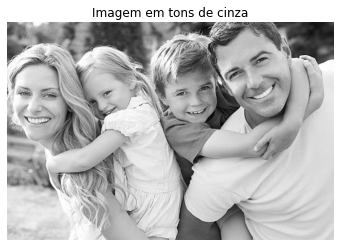

In [3]:
# Imagem em tons de cinza
plt.imshow(img_cinza, cmap='gray')
plt.title("Imagem em tons de cinza")
plt.axis("off")
plt.show()

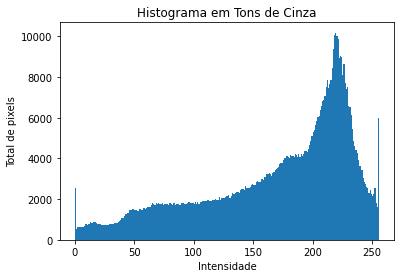

In [4]:
# Mostra o histograma em tons de cinza
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Total de pixels")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

***

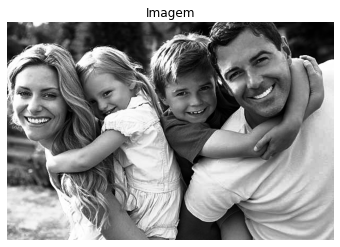

In [5]:
# Imagem equalizada
img_equalizada = cv.equalizeHist(img_cinza)
plt.imshow(img_equalizada, cmap='gray')
plt.title("Imagem")
plt.axis("off")
plt.show()

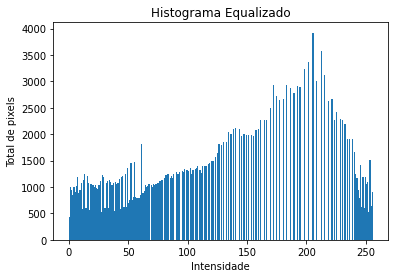

In [6]:
# Mostra o equalizado
plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Total de pixels")
plt.hist(img_equalizada.ravel(), 256, [0, 256])
plt.show()

***

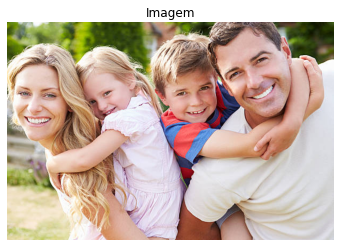

In [7]:
# Imagem colorida
img_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_colorida)
plt.title("Imagem")
plt.axis("off")
plt.show()

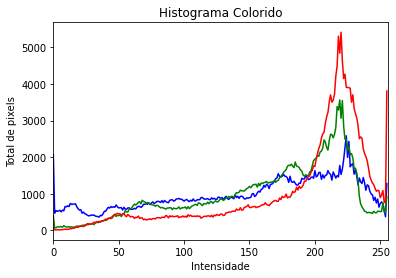

In [8]:
# Histograma da imagem colorida
canais = cv.split(img)
cores = ("b", "g", "r")
plt.figure()
plt.title("Histograma Colorido")
plt.xlabel("Intensidade")
plt.ylabel("Total de pixels")
# zip cria uma lista de tuplas formadas pelas união das listas passadas
for (canal, cor) in zip(canais, cores):
    histograma = cv.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(histograma, color=cor)
    plt.xlim([0, 256])
plt.show()